<div align="center">
    <h1> <b>MO416 - IC/Unicamp  </h1>
    <h2> <b>Projeto Final - Aplicação de Aprendizado de Máquina na Decifração de Captchas </h2>
</div>

<table>
<tr><td style="text-align:left">Christian Maekawa</td>  <td>231867</td>  </tr>
<tr><td style="text-align:left">Giovane de Morais</td>  <td>192683</td>  </tr>
<tr><td style="text-align:left">Maisa Silva      </td>  <td>181831</td>  </tr>
<tr><td style="text-align:left">Matteus Vargas   </td>  <td>262885</td>  </tr>
<tr><td style="text-align:left">Stéfani Fernandes</td>  <td>147939</td>  </tr>
</table>

# 1 - Introdução

O código presente gera aleatóriamente imagens Captcha alfanuméricas.

CAPTCHA - _Completely Automated Public Turing test to tell Computers and Humans Apart_ é um teste para distinção entre humanos e robôs. Muitas vezes CAPTCHAS aplicados em websites para verificar se a submissão de um form é feita por uma humano ou programa, e assim previnir ataques. 

O recurso do Captcha utiliza a superioridade da visão humana em relação a visão computacional, por exemplo um captcha alfanúmerico em uma imagem com distorções e ruídos é mais facilmente compreendido por um ser humano do que uma máquina. A visão ainda é uma das capacidades humanas superiores a capacidade das máquinas. Um paralelo ao CAPTCHA são os sistemas de OCR - _Optical Character Recognition_, os quais tem o objetivo de reconher textos físicos, como por exemplo impressos e escritos a mão. 

In [1]:
###
#
# Imports
#
###
from datetime import datetime
from captcha.image import ImageCaptcha
from captcha.audio import AudioCaptcha
import matplotlib.pyplot as plt
import random
import string
import os
import itertools


## 1.1 Conteúdo dos captchas

Os captchas gerados possuem símbolos alfa-numéricos e case-sensitive

In [2]:
###
#
# Símbolos disponíveis para criação do captcha
#
###
symbols = string.ascii_uppercase + "0123456789"
print (symbols)

ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789


# 2 -  Geração do Captcha

O texto do captcha é gerado por um string de tamanho fixo de 5 carcteres, escolhidos aleatóriamente dos símbolos disponíveis.
Para nossos experimentos utilizamos duas estratégias de criação de imagens de teste, na primeira os símbolos são escolhidos aleatoriamente. E na segunda uma primeira os símbolos possíveis geram algumas palavras, de forma que uma palavra não possua os símbolos das outras palavras, na sequência é realizada todas as permutações possíveis dos símbolos, gerando novas palavras. Esse processo é repetido até serem criadas imagens no total determinado para o dataset de treino.

In [3]:
###
#
# Função para criação de texto aleatório de tamanho parametrizado
#
###
def create_random_text(symbols, text_size=5):

    s_text = '';
    for i in range(text_size):

        # Adiciona simbolo escolhido aleatoriamente ao texto
        s_text = s_text + random.choice(symbols);

    return s_text;

In [4]:
###
#
# Função para criação de texto aleatório de tamanho parametrizado que contenha um símbolo especifico
# em indice específico
#
###
def create_random_text_with_symbol(symbols, text_size=5, letter='a', idx_letter=0):

    s_text = '';
    for i in range(text_size):

        if(i == idx_letter):
        
            # Adiciona simbolo informado aleatoriamente ao texto
            s_text = s_text + letter;
            
        else:
        
            # Adiciona simbolo escolhido aleatoriamente ao texto
            s_text = s_text + random.choice(symbols);

    return s_text;

In [5]:
###
#
# Função para criação de imagem captcha com texto parametrizado
#
###
def create_image_captcha(captcha_text, captcha_dir="images", plot_image=False):
    
    image_captcha = ImageCaptcha();
    image = image_captcha.generate_image(captcha_text);
    
    # Salva imagem captcha
    if(not plot_image):
        image_file = captcha_dir + "/" + captcha_text + ".png"
        image_captcha.write(captcha_text, image_file)

    # Mostra imagem
    if(plot_image):
        fig = plt.figure()
        plt.imshow(image.copy());
        plt.axis('off')
        plt.show()
    

Utilizamos a lib _captcha_ do python para a geração da imagem, ela recebe por parametro o texto e que é foramto para uma fonte específica e adicionados rúidos de traço e pontos. Conforme imagem abaixo:

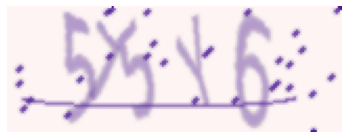

In [6]:
###
#
# Visualização de uma imagem gerada
#
###
captcha_text = create_random_text(symbols)
create_image_captcha(captcha_text, plot_image = True)


# 3 - Dataset
Geramos um dataset de 1000 imagens e adicionamos no diretório criado com o horário do processamento. Dessa forma, podemos diferenciar cada dataset.

In [7]:
# Número de imagens de cada dataset
num_imagens_train = 100000 # 100 mil 
#num_imagens_train = 1200 # 100 mil 
#num_imagens_train = 10000 # 100 mil 
num_imagens_test = 100000*0.2 # 20 mil 
#num_imagens_test = 0
text_size = 5
num_symbols = len(symbols)

## 3.1 - Dataset de treino com letras randomicas

In [8]:
###
#
# Geração de Dataset
#
###

images_dir = "images/dataset_train_random_" + str(datetime.now())
os.mkdir(images_dir)

for i in range(num_imagens_train):
    captcha_text = create_random_text(symbols, text_size=text_size)
    create_image_captcha(captcha_text, captcha_dir = images_dir)


## 3.2 - Dataset de treino com Permutação de letras

Aplicar permutação de letras garante que todas letras terão o mesmo número de representações e também que todas as letras estarão presentes em todas as posições, esse dois fatores tornam o dataset uma melhora representação do espaço amostral.

In [12]:
images_dir = "images/dataset_train_perm_" + str(datetime.now())
os.mkdir(images_dir)

symbols_not_used = symbols;
n_images = 0;

#while symbols_not_used != '':        
while n_images < num_imagens_train:
    
    # Reinicio os symbols para um novo looping até atingir o número de imagens necessárias.
    if(symbols_not_used == ''):
        symbols_not_used = symbols;


    # Crio um texto com letras aleatória ainda não escolhidas.
    captcha_text = create_random_text(symbols_not_used, text_size=text_size)
    symbols_not_used = symbols_not_used.translate({ord(i): None for i in captcha_text})
    
    # Permutação
    for text in itertools.permutations(captcha_text, text_size):
        text = ''.join(text)
        #Não gerar imagens repetidas
        if not os.path.exists(os.path.join(images_dir, text+'.png')):            
            create_image_captcha(text, captcha_dir = images_dir)
            n_images = n_images + 1;   

    
    

## 3.3 - Dataset de teste com todas as letras presentes em ao menos uma amostra.

In [10]:
images_dir = "images/dataset_test" + str(datetime.now())
os.mkdir(images_dir)

#Garante a quantidade de imagens necessárias 
for j in range(int(num_imagens_test/(num_symbols*text_size))):

    # Gera imagem de cada letra em cada posição
    for letter in (symbols):
        for i in range(text_size):
            captcha_text = create_random_text_with_symbol(symbols, text_size=text_size, letter=letter, idx_letter=i)
            create_image_captcha(captcha_text, captcha_dir = images_dir)